<a href="https://colab.research.google.com/github/ImJongHwan/practice-ml-nlp/blob/main/7_deep_learning/10_MultiLayer_Percentron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다층 퍼셉트론(MultiLayer Perceptron, MLP)

https://wikidocs.net/49071

## 20개 뉴스 그룹 (Twenty Newsgroups) 데이터에 대한 이해

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [2]:
newsdata = fetch_20newsgroups(subset = 'train')

In [3]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [4]:
print(f'훈련용 샘플의 개수: {len(newsdata.data)}')

훈련용 샘플의 개수: 11314


In [5]:
print(f'총 주제의 개수: {len(newsdata.target_names)}')
print(newsdata.target_names)

총 주제의 개수: 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
print(f'첫번째 샘플의 레이블: {newsdata.target[0]}')

첫번째 샘플의 레이블: 7


In [7]:
print(f'7번 레이블이 의미하는 주제: {newsdata.target_names[7]}')

7번 레이블이 의미하는 주제: rec.autos


In [8]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [10]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [13]:
data.isnull().values.any()

False

In [16]:
print(f'중복을 제외한 샘플의 수: {data["email"].nunique()}')
print(f'중복을 제외한 주제의 수: {data["target"].nunique()}')

중복을 제외한 샘플의 수: 11314
중복을 제외한 주제의 수: 20


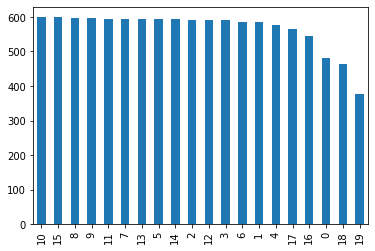

In [17]:
data['target'].value_counts().plot(kind='bar')

In [19]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [20]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [21]:
vocab_size = 10000
num_classes = 20

In [24]:
def prepare_data(train_data, test_data, mode):
  tokenizer = Tokenizer(num_words = vocab_size)
  tokenizer.fit_on_texts(train_data)
  X_train = tokenizer.texts_to_matrix(train_data, mode=mode)
  X_test = tokenizer.texts_to_matrix(test_data, mode=mode)
  return X_train, X_test, tokenizer.index_word

In [25]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes)
y_test = to_categorical(test_label, num_classes)

In [26]:
print(f'훈련 샘플 본문의 크기: {X_train.shape}')
print(f'훈련 샘플 레이블의 크기: {y_train.shape}')
print(f'테스트 샘플 본문의 크기: {X_test.shape}')
print(f'테스트 샘플 레이블의 크기: {y_test.shape}')

훈련 샘플 본문의 크기: (11314, 10000)
훈련 샘플 레이블의 크기: (11314, 20)
테스트 샘플 본문의 크기: (7532, 10000)
테스트 샘플 레이블의 크기: (7532, 20)


In [28]:
print(f'빈도수 상위 1번 단어: {index_to_word[1]}')
print(f'빈도수 상위 9999번 단어: {index_to_word[9999]}')

빈도수 상위 1번 단어: the
빈도수 상위 9999번 단어: mic


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [33]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
  model = Sequential()
  model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
  score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
  return score[1]

In [34]:
modes = ['binary', 'count', 'tfidf', 'freq']

for mode in modes:
  X_train, X_test, _ = prepare_data(train_email, test_email, mode)
  score = fit_and_evaluate(X_train, y_train, X_test, y_test)
  print(mode + ' 모드의 테스트 정확도: ', score)

Epoch 1/5
80/80 [==============================] - 4s 43ms/step - loss: 2.2857 - accuracy: 0.3365 - val_loss: 0.9756 - val_accuracy: 0.8198
Epoch 2/5
80/80 [==============================] - 3s 40ms/step - loss: 0.8719 - accuracy: 0.7610 - val_loss: 0.4503 - val_accuracy: 0.8816
Epoch 3/5
80/80 [==============================] - 3s 40ms/step - loss: 0.4394 - accuracy: 0.8834 - val_loss: 0.3540 - val_accuracy: 0.9037
Epoch 4/5
80/80 [==============================] - 3s 40ms/step - loss: 0.2585 - accuracy: 0.9338 - val_loss: 0.3050 - val_accuracy: 0.9055
Epoch 5/5
80/80 [==============================] - 3s 40ms/step - loss: 0.1670 - accuracy: 0.9629 - val_loss: 0.2963 - val_accuracy: 0.9081
binary 모드의 테스트 정확도:  0.8279341459274292
Epoch 1/5
80/80 [==============================] - 4s 44ms/step - loss: 2.7220 - accuracy: 0.2519 - val_loss: 1.6233 - val_accuracy: 0.7535
Epoch 2/5
80/80 [==============================] - 3s 41ms/step - loss: 1.4566 - accuracy: 0.6341 - val_loss: 0.7226 - v